# Term2 Sprint20 授業課題 
## コーディング課題：セグメンテーション

KaggleのTGS Salt Identification Challengeのデータセットを使用する。

[TGS Salt Identification Challenge | Kaggle](https://www.kaggle.com/c/tgs-salt-identification-challenge "TGS Salt Identification Challenge | Kaggle")
    
セグメンテーション手法としてU-Net[1]を使う。

[1]O.Ronneberger, P.Fischer, T.Brox. U-Net: Convolutional Networks for Biomedical Image Segmentation. Medical Image Computing and Computer-Assisted Intervention (MICCAI), Springer, LNCS, Vol.9351: 234–241, 2015

https://arxiv.org/pdf/1505.04597.pdf

## 1. 学習・推定
以下のKeras実装を使用して学習・推定を行う。

[zhixuhao/unet: unet for image segmentation](https://github.com/zhixuhao/unet "zhixuhao/unet: unet for image segmentation")

**GPU環境での学習**

大規模なデータセット、大きなモデルになるため、GPUを使用する必要がある。

**新たなデータセットの適用**

Sprint18,19と同様に実装で用意されたものとは異なるデータセットを入力する。

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

import os
os.chdir("/content/gdrive/My Drive/Colab Notebooks/")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
!git clone https://github.com/zhixuhao/unet.git

Cloning into 'unet'...
remote: Enumerating objects: 394, done.
remote: Total 394 (delta 0), reused 0 (delta 0), pack-reused 394
Receiving objects: 100% (394/394), 44.91 MiB | 22.25 MiB/s, done.
Resolving deltas: 100% (80/80), done.
Checking out files: 100% (253/253), done.


In [0]:
os.chdir("unet")
os.getcwd()

'/content/gdrive/My Drive/Colab Notebooks/unet'

### まずは既存の細胞データで学習を実行してみる(epochs=5)

In [0]:
from model import *
from data import *

#os.environ["CUDA_VISIBLE_DEVICES"] = "0"


data_gen_args = dict(rotation_range=0.2,
                    width_shift_range=0.05,
                    height_shift_range=0.05,
                    shear_range=0.05,
                    zoom_range=0.05,
                    horizontal_flip=True,
                    fill_mode='nearest')
myGene = trainGenerator(2,'data/membrane/train','image','label',data_gen_args,save_to_dir = None)

model = unet(pretrained_weights = None,input_size = (256,256,1))
model_checkpoint = ModelCheckpoint('unet_membrane.hdf5', monitor='loss',verbose=1, save_best_only=True)
model.fit_generator(myGene,steps_per_epoch=300,epochs=5,callbacks=[model_checkpoint])

testGene = testGenerator("data/membrane/test")
results = model.predict_generator(testGene,30,verbose=1)
saveResult("data/membrane/test",results)

Using TensorFlow backend.
W0614 05:44:31.638858 139806443960192 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0614 05:44:31.653147 139806443960192 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0614 05:44:31.656327 139806443960192 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4185: The name tf.truncated_normal is deprecated. Please use tf.random.truncated_normal instead.

W0614 05:44:31.679056 139806443960192 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0614 05:44:31.742

Epoch 1/5
Found 30 images belonging to 1 classes.
Found 30 images belonging to 1 classes.
300/300 [==============================] - 60s 200ms/step - loss: 0.3357 - acc: 0.8538

Epoch 00001: loss improved from inf to 0.33574, saving model to unet_membrane.hdf5
Epoch 2/5
300/300 [==============================] - 53s 177ms/step - loss: 0.2783 - acc: 0.8975

Epoch 00002: loss improved from 0.33574 to 0.27828, saving model to unet_membrane.hdf5
Epoch 3/5
300/300 [==============================] - 54s 181ms/step - loss: 0.2518 - acc: 0.9125

Epoch 00003: loss improved from 0.27828 to 0.25181, saving model to unet_membrane.hdf5
Epoch 4/5
300/300 [==============================] - 55s 184ms/step - loss: 0.2389 - acc: 0.9188

Epoch 00004: loss improved from 0.25181 to 0.23890, saving model to unet_membrane.hdf5
Epoch 5/5
300/300 [==============================] - 56s 186ms/step - loss: 0.2284 - acc: 0.9238

Epoch 00005: loss improved from 0.23890 to 0.22836, saving model to unet_membrane.hdf5

W0614 05:49:41.634252 139806443960192 util.py:61] Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
W0614 05:49:41.680755 139806443960192 util.py:61] Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
W0614 05:49:41.730975 139806443960192 util.py:61] Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
W0614 05:49:41.779244 139806443960192 util.py:61] Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
W0614 05:49:41.823418 139806443960192 util.py:61] Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
W0614 05:49:41.868225 139806443960192 util.py:61] Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress 

### テストデータの正解画像と出力画像を描画

In [0]:
!pip install natsort
from natsort import natsorted

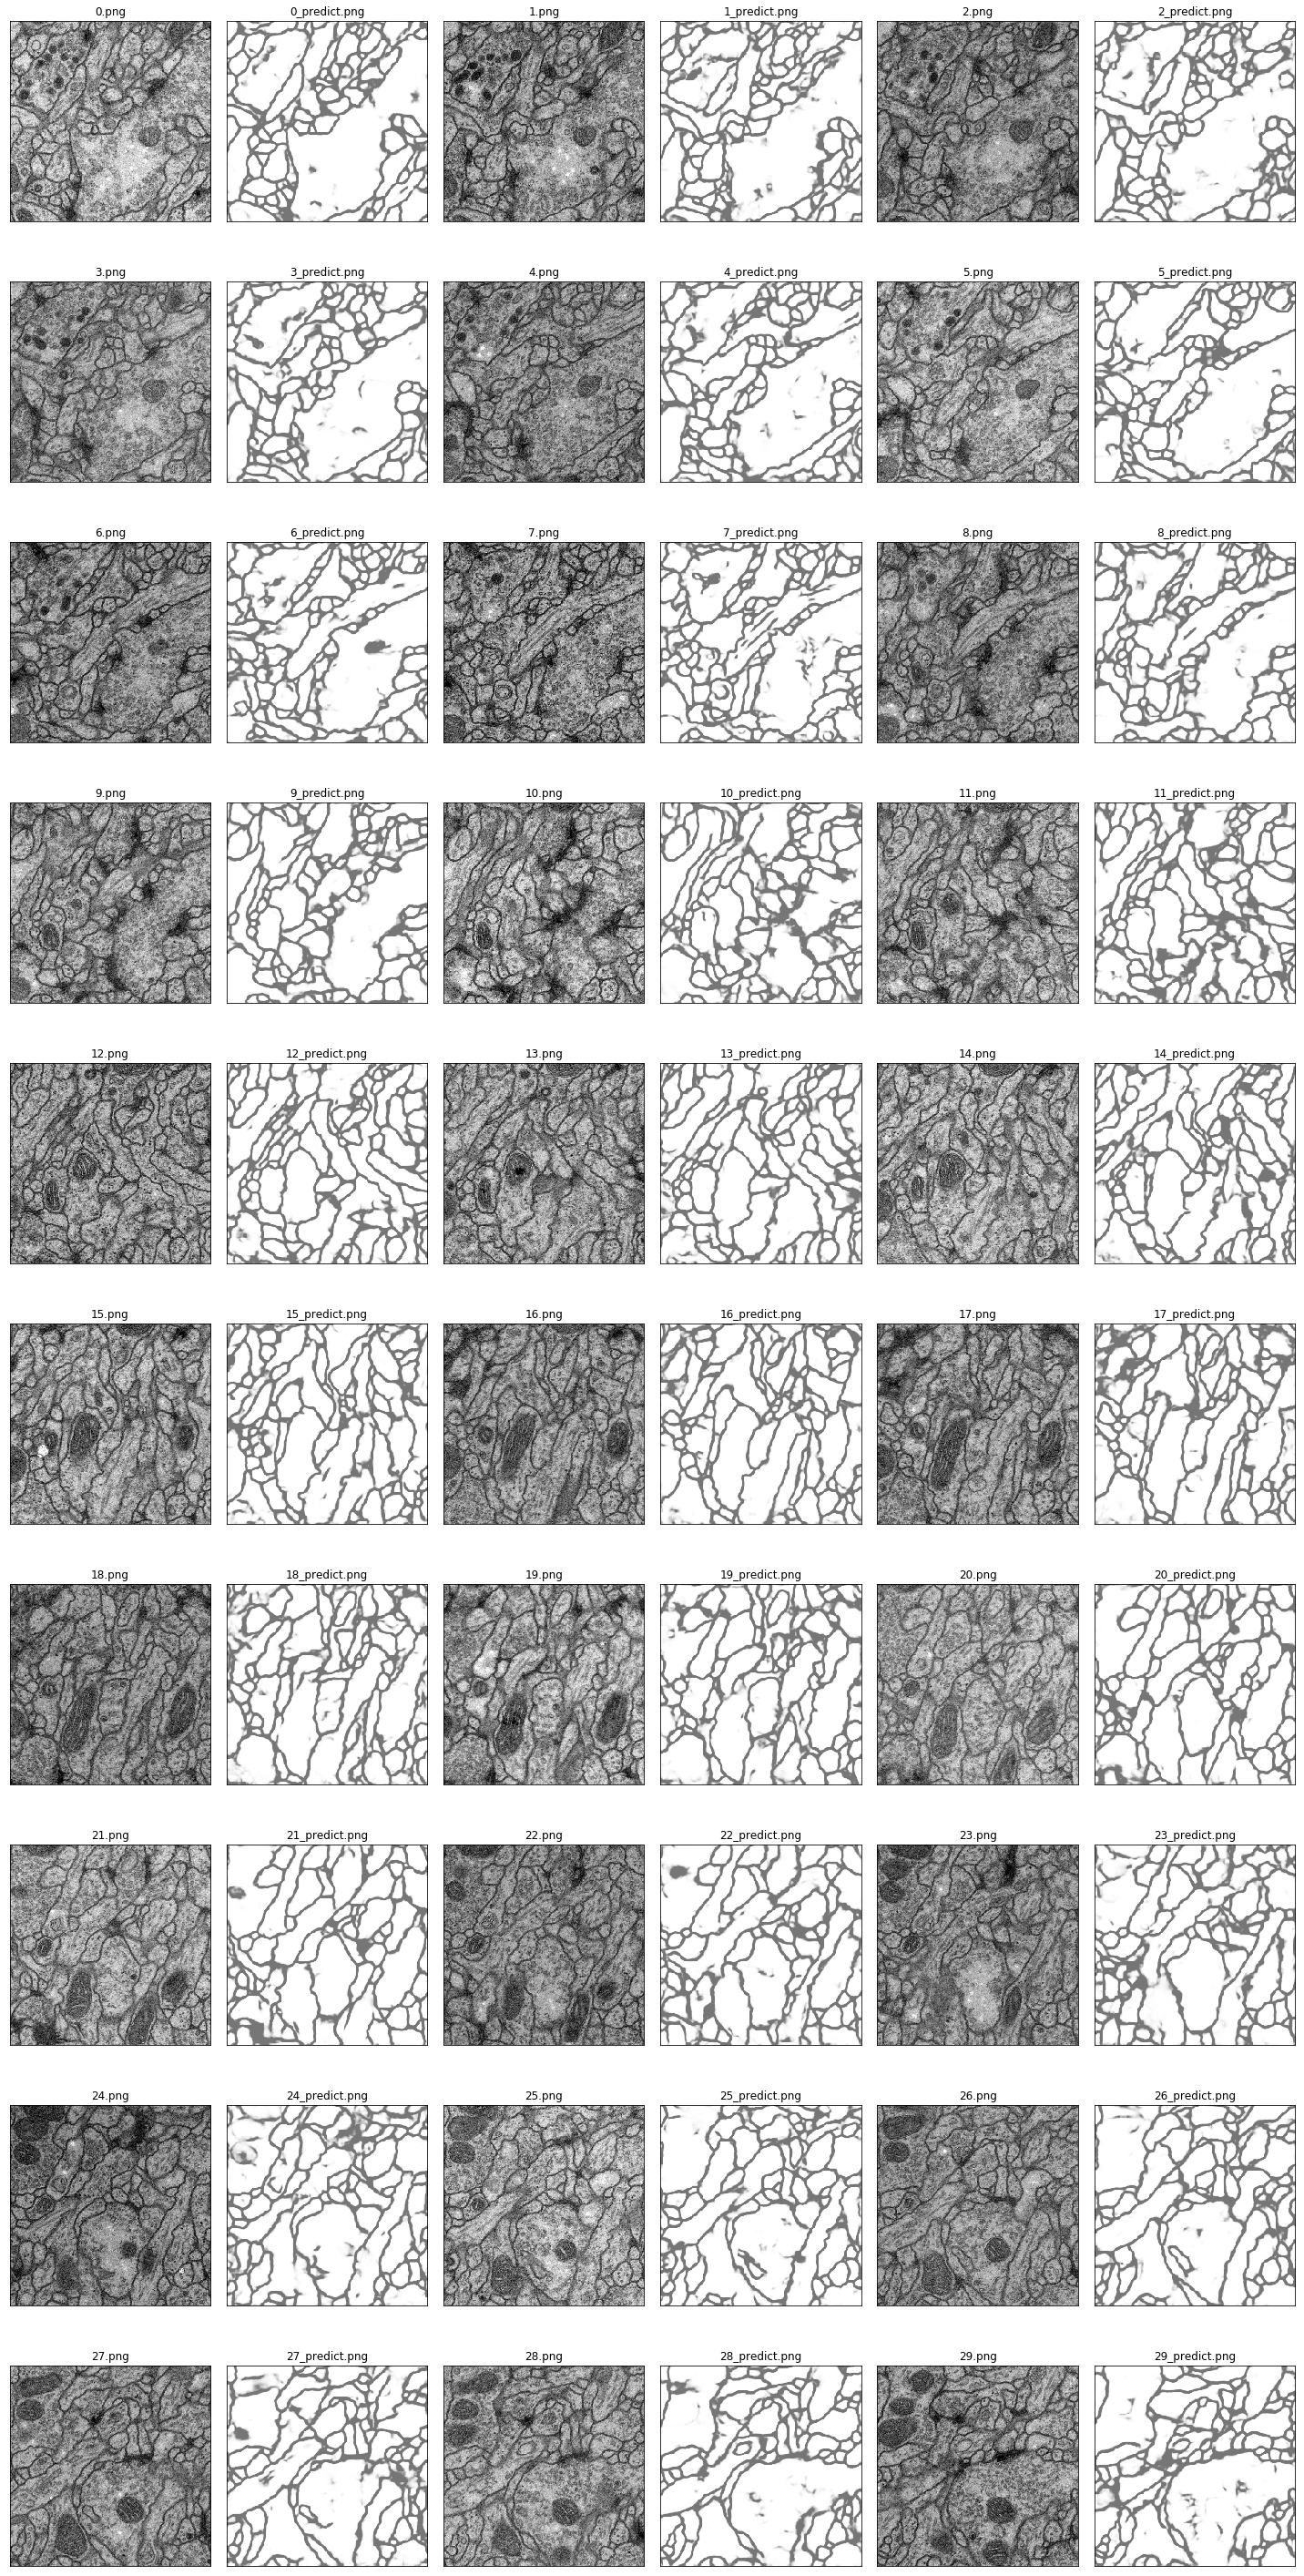

In [0]:
import cv2
from matplotlib import pyplot as plt

path = "./data/membrane/test/"
files = []
fig, ax = plt.subplots(10,6, figsize=(20,40))

for i, x in enumerate(natsorted(os.listdir(path)), 1):
  if os.path.isfile(path + x):
    plt.subplot(10,6,i)
    img = cv2.imread(path + x)
    plt.imshow(img)
    plt.tick_params(labelbottom=False, labelleft=False)
    plt.tick_params(bottom=False, left=False)
    plt.title(x)
plt.tight_layout()
plt.show()

### 次にTGS Salt Identification Challengeのデータで学習してみる

In [0]:
os.chdir("../")

In [0]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"kagglekztsh","key":"85d7927d916cbaefda3e914b9a79ce4b"}'}

In [0]:
!mkdir -p ~/.kaggle

In [0]:
!ls ~/.kaggle/

kaggle.json


In [0]:
!cp kaggle.json ~/.kaggle/

In [0]:
!pip install -q kaggle

In [0]:
!chmod 600 /root/.kaggle/kaggle.json

In [0]:
!kaggle competitions download -c tgs-salt-identification-challenge

  0% 0.00/322k [00:00<?, ?B/s]
100% 322k/322k [00:00<00:00, 22.5MB/s]
  0% 0.00/264k [00:00<?, ?B/s]
100% 264k/264k [00:00<00:00, 37.0MB/s]
  0% 0.00/922k [00:00<?, ?B/s]
100% 922k/922k [00:00<00:00, 61.2MB/s]
 97% 158M/163M [00:01<00:00, 110MB/s]
100% 163M/163M [00:01<00:00, 130MB/s]
 66% 25.0M/37.9M [00:00<00:00, 37.5MB/s]
100% 37.9M/37.9M [00:00<00:00, 59.7MB/s]


In [0]:
!unzip train.zip -d train
!unzip test.zip -d test

Archive:  train.zip
   creating: train/images/
   creating: train/masks/
  inflating: train/images/8d08955cdf.png  
  inflating: train/images/e045664b46.png  
  inflating: train/images/4989c6509e.png  
  inflating: train/images/fff4eb4941.png  
  inflating: train/images/3a310860a3.png  
  inflating: train/images/7a696bb878.png  
  inflating: train/images/8d3ee9356b.png  
  inflating: train/images/213e0a9f7b.png  
  inflating: train/images/78f17697f2.png  
  inflating: train/images/bd20d18369.png  
  inflating: train/images/de08c5a3b7.png  
  inflating: train/images/f06ef6c8b7.png  
  inflating: train/images/b2d02516e1.png  
  inflating: train/images/5edb37f5a8.png  
  inflating: train/images/b1f0e104f5.png  
  inflating: train/images/40e8e14e60.png  
  inflating: train/images/6e1444d88d.png  
  inflating: train/images/f342603c76.png  
  inflating: train/images/7ba58ee1be.png  
  inflating: train/images/14a89a1840.png  
  inflating: train/images/4319885cf1.png  
  inflating: train/image

In [0]:
os.chdir("unet")
os.getcwd()

'/content/gdrive/My Drive/Colab Notebooks/unet'

In [0]:
print(len(os.listdir("data/salt/test/images")))

18000


In [0]:
# テストデータのpngファイル名を連番にする
!ls data/salt/test/images/*.png | awk '{printf "mv %s %s.png\n",$0,NR-1}' | sh

In [0]:
# データの画素数、チャンネル数を確認
img = cv2.imread("data/salt/train/images/00a3af90ab.png")
print(img.shape)


(101, 101, 3)


In [0]:
from model import *
from data import *

#os.environ["CUDA_VISIBLE_DEVICES"] = "0"

# 訓練データジェネレータの引数を設定
data_gen_args = dict(rotation_range=0.2,
                    width_shift_range=0.05,
                    height_shift_range=0.05,
                    shear_range=0.05,
                    zoom_range=0.05,
                    horizontal_flip=True,
                    fill_mode='nearest')

# 訓練データジェネレータ
# resize用のtarget_sizeを設定
# 4回のsize-up-downで割り切れるように2^4の倍数で設定
# saltデータは3chカラーなのでimage_color_modeを設定
myGene = trainGenerator(2,'data/salt/train','images','masks',
                        data_gen_args,save_to_dir = None, target_size=(256,256),
                        image_color_mode="rgb")

# ジェネレータからのinput_sizeを設定
model = unet(pretrained_weights = None, input_size = (256,256,3))
model.summary()
model_checkpoint = ModelCheckpoint(
    'unet_salt.hdf5', monitor='loss',verbose=1, save_best_only=True)
model.fit_generator(
    myGene,steps_per_epoch=300,epochs=1,callbacks=[model_checkpoint])

# テストデータジェネレータ
# 今回はカラーなので、as_gray=False, flag_multi_class=True
# 仮にモノクロの場合は、as_gray=True, flag_multi_class=False
testGene = testGenerator("data/salt/test/images", num_image=18000, 
                         target_size=(256,256), as_gray=False, flag_multi_class=True)

results = model.predict_generator(testGene, steps=100, verbose=1)
saveResult("data/salt/test",results)

/content/gdrive/My Drive/Colab Notebooks/unet/model.py:55: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("co...)`
  model = Model(input = inputs, output = conv10)


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_26 (InputLayer)           (None, 256, 256, 3)  0                                            
__________________________________________________________________________________________________
conv2d_488 (Conv2D)             (None, 256, 256, 64) 1792        input_26[0][0]                   
__________________________________________________________________________________________________
conv2d_489 (Conv2D)             (None, 256, 256, 64) 36928       conv2d_488[0][0]                 
__________________________________________________________________________________________________
max_pooling2d_101 (MaxPooling2D (None, 128, 128, 64) 0           conv2d_489[0][0]                 
__________________________________________________________________________________________________
conv2d_490

W0614 12:35:38.720624 140691314145152 util.py:61] Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
W0614 12:35:38.801359 140691314145152 util.py:61] Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
W0614 12:35:38.826414 140691314145152 util.py:61] Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
W0614 12:35:38.909319 140691314145152 util.py:61] Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
W0614 12:35:38.977951 140691314145152 util.py:61] Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
W0614 12:35:39.024419 140691314145152 util.py:61] Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress 

## 2. コードリーディング
論文[1]に目を通した上で、上記実装のコードリーディングを行う。

### model.py

In [0]:
import numpy as np 
import os
import skimage.io as io
import skimage.transform as trans
import numpy as np
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras import backend as keras


def unet(pretrained_weights = None,input_size = (256,256,1)):
    inputs = Input(input_size)
    # 畳み込み層、畳み込み層、Maxプーリング層を4回繰り返し、最後のプーリングの直前でドロップアウト
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(inputs)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv4)
    drop4 = Dropout(0.5)(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)
    
    # 畳み込み層、畳み込み層、ドロップアウト
    conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool4)
    conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv5)
    drop5 = Dropout(0.5)(conv5)
    
    # 逆畳み込み層、マージ層、畳み込み層、畳み込み層を4回繰り返す
    up6 = Conv2D(512, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(drop5))
    merge6 = concatenate([drop4,up6], axis = 3)
    conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge6)
    conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv6)

    up7 = Conv2D(256, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv6))
    merge7 = concatenate([conv3,up7], axis = 3)
    conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge7)
    conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv7)

    up8 = Conv2D(128, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv7))
    merge8 = concatenate([conv2,up8], axis = 3)
    conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge8)
    conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv8)

    up9 = Conv2D(64, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv8))
    merge9 = concatenate([conv1,up9], axis = 3)
    conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge9)
    conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    
    # 最後は2フィルタ、1フィルタまで絞り、ここでは2値分類に帰着させる
    conv9 = Conv2D(2, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv10 = Conv2D(1, 1, activation = 'sigmoid')(conv9)

    model = Model(input = inputs, output = conv10)

    model.compile(optimizer = Adam(lr = 1e-4), loss = 'binary_crossentropy', metrics = ['accuracy'])
    
    #model.summary()

    if(pretrained_weights):
    	model.load_weights(pretrained_weights)

    return model